# **SVD Applications Lab, part 2: PCA and dimension reduction**

**Instructions:** Work through the cells top-to-bottom. Cells labeled **EXERCISE** include TODOs.

**Goals**
- To further explore an example from class, seeing how random noise added to a matrix can make it full-rank, but this noise can be smoothed away by dimensionality reduction.
- To implement dimensionality reduction in numpy.
- To clean up 'real-life' ⚽️ data to prepare it for PCA.
- To analyze what principal components are measuring.

In [2]:
# Setup: imports & utilities
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=4, suppress=True)
rng = np.random.default_rng(432)

## Intro
Recall the SVD of an $n\times d$ matrix $A$:
$$A = U\,\Sigma\,V^\top,$$
where $U$ is $n\times n$ orthogonal, $V$ is $d\times d$ orthogonal, and the nonzero singular values of $A$ appear on the diagonal of the $n\times d$ diagonal matrix $\Sigma$ (ordered $\sigma_1 \ge \sigma_2 \ge \cdots \ge 0$). Right singular vectors (columns of $V$) live in the input space; left singular vectors (columns of $U$) live in the output space.

In class, we saw how the right singular vectors $\mathbf{v}_i$ can be thought of as *principal component directions*, and we might want to reduce dimension of the data by projecting onto $\mathbf{v}_1,\dots,\mathbf{v}_k$.

## 1. Reducing dimension

In class we analyzed this matrix:
$$
X = \begin {bmatrix}
0 & 0 & 1 & 2 \\
1 & -1 & -1 & -2 \\
1 & -1 & 1 & 2 \\
1 & -1 & -1 & -2 \\
1 & -1 & 1 & 2
\end {bmatrix},
$$
which we can see has rank 2. Let's add noise to the data and see what happens when we reduce dimension.

### 1.1 EXERCISE: Add noise and compute the rank

In [ ]:
# Step 1: Define the original matrix X
X = np.array([
    [0, 0, 1, 2],
    [1, -1, -1, -2],
    [1, -1, 1, 2],
    [1, -1, -1, -2],
    [1, -1, 1, 2]
], dtype=float)

# Step 2: Compute rank of original matrix
rank_original = np.linalg.matrix_rank(X)

# Step 3: Add small random noise to make it full rank
# np.random.seed(789) ### TODO: experiment with different seeds, default seed is 432
# Parameter: standard deviation of noise
noise_std = 0.01  # <-- TODO: change this value. What happens when you make it larger?
noise = np.random.normal(0, noise_std, X.shape)
X_noisy = X + noise

### TODO: # Step 4: Compute rank of noisy matrix
# rank_noisy = ...


# Print results
print("Original Matrix:\n", X)
print("Rank of Original Matrix:", rank_original)
print("\nNoisy Matrix:\n", X_noisy)
print("Rank of Noisy Matrix:", rank_noisy)

Original Matrix:
 [[ 0.  0.  1.  2.]
 [ 1. -1. -1. -2.]
 [ 1. -1.  1.  2.]
 [ 1. -1. -1. -2.]
 [ 1. -1.  1.  2.]]
Rank of Original Matrix: 2

Noisy Matrix:
 [[-0.0016  0.0054  1.0078  2.0187]
 [ 1.0017 -0.9869 -1.0041 -1.998 ]
 [ 0.9887 -1.0053  0.9818  2.0021]
 [ 0.9959 -0.9896 -1.0097 -1.997 ]
 [ 1.0066 -0.9977  0.9983  1.9959]]
Rank of Noisy Matrix: 4


### 1.2 EXERCISE: Analyze energy captured by the top singular values

In [ ]:
# Exercise: Compute SVD and analyze energy captured by top singular values

# 1. Compute the SVD of the noisy matrix
U, S, Vt = np.linalg.svd(X_noisy, full_matrices=False)

# Print the singular values
print("Singular values:", S)

# 2. Compute total energy (sum of squares of singular values)
total_energy = np.sum(S**2)

# Energy captured by first singular value
### TODO:
# energy_1 = ...
energy_1_ratio = energy_1 / total_energy

# Energy captured by first two singular values
### TODO:
# energy_2 = ...
energy_2_ratio = energy_2 / total_energy

# Print results
print(f"Total energy: {total_energy:.4f}")
print(f"Energy captured by first singular value: {energy_1:.4f} ({energy_1_ratio:.2%})")
print(f"Energy captured by first two singular values: {energy_2:.4f} ({energy_2_ratio:.4%})")

Singular values: [5.0051 2.8187 0.0193 0.0053]
Total energy: 32.9963
Energy captured by first singular value: 25.0506 (75.92%)
Energy captured by first two singular values: 32.9959 (99.9988%)


### Projecting onto the best $k$-dimensional subspace

Remember that we can reduce dimension by projecting onto the subspace spanned by the first $k$ right singular vectors.

### 1.3 EXERCISE - implement dimensionality reduction

In [ ]:
# Exercise: Define a function to compute coordinates in the best k-dimensional subspace

def compute_coordinates(X, k):
    """
    Computes the coordinates of the rows of X in the subspace spanned by the first k right singular vectors.
    
    Parameters:
        X (ndarray): The data matrix (n x d).
        k (int): Number of dimensions to keep.
    
    Returns:
        coords (ndarray): The reduced coordinates (n x k).
    """
    # Compute SVD
    U, S, Vt = np.linalg.svd(X, full_matrices=False) # remember that full_matrices=False computes the 'economy' SVD
    
    # Take the first k right singular vectors
    ### TODO:
    # V_k = ...  # shape (k, n)
    
    # Compute coordinates: project X onto V_k
    ### TODO:
    # coords = ...  # shape (m x k)
    
    return coords

# Test the function on the noisy matrix
### Try several different values of k. What changes?
k = 2
coords_k = compute_coordinates(X_noisy, k)

print(f"Coordinates in {k}-dimensional subspace:\n", coords_k)

Coordinates in 2-dimensional subspace:
 [[-2.2563  0.0061]
 [ 2.2353 -1.4074]
 [-2.2306 -1.4087]
 [ 2.237  -1.4052]
 [-2.2324 -1.416 ]]


## 2. A soccer league. ⚽

A new soccer league has formed. The league suits believe that the champion should be determined by a weighted sum of these stats: Wins, Losses, Draws, Goals Scored, Goals Against, and Goal Differential. But they cannot agree on which weighted sum is best, so they've hired you, an independent consultant.

Each team played **14 games**. The columns are:

- **Wins**: Number of games won.
- **Losses**: Number of games lost.
- **Draws**: Number of games tied.
- **Goals Scored**: Total goals scored by the team.
- **Goals Against**: Total goals conceded by the team.
- **Goal Difference**: Goals Scored − Goals Against.

| Team             | Wins | Losses | Draws | Goals Scored | Goals Against | Goal Difference |
|------------------|------|--------|-------|--------------|---------------|-----------------|
| Biology          | 8    | 4      | 2     | 24           | 16            | 8              |
| Mathematics      | 7    | 4      | 3     | 23           | 15            | 8              |
| Chemistry        | 6    | 7      | 1     | 21           | 23            | -2             |
| Physics          | 6    | 4      | 4     | 31           | 27            | 4              |
| Philosophy       | 6    | 4      | 4     | 29           | 24            | 5              |
| Computer Science | 5    | 6      | 3     | 20           | 24            | -4             |
| Classics         | 5    | 9      | 0     | 17           | 25            | -8             |
| History          | 4    | 9      | 1     | 18           | 29            | -11            |

Note that our data are not centered! The first thing to do is center and standardize. We need to compute the mean and standard deviation in each *feature* and use that to translate the data.

### 2.1 EXERCISE: Center and standardize the data


In [ ]:
# Soccer league data as a NumPy array
teams = ["Biology", "Mathematics", "Chemistry", "Physics", "Philosophy", "Computer Science", "Classics", "History"]

X = np.array([
    [8, 4, 2, 24, 16, 8],    # Biology
    [7, 4, 3, 23, 15, 8],    # Mathematics
    [6, 7, 1, 21, 23, -2],   # Chemistry
    [6, 4, 4, 31, 27, 4],    # Physics
    [6, 4, 4, 29, 24, 5],    # Philosophy
    [5, 6, 3, 20, 24, -4],   # Computer Science
    [5, 9, 0, 17, 25, -8],   # Classics
    [4, 9, 1, 18, 29, -11]   # History
], dtype=float)

# Exercise: Center and standardize X
# 1. Compute column means and std deviations
### TODO:
# means = ...
# stds = ...

# 2. Standardize
X_std = (X - means) / stds

print("Standardized data:\n", X_std)

Standardized data:
 [[ 1.8226 -0.898  -0.1796  0.2406 -1.4876  1.17  ]
 [ 0.9649 -0.898   0.5388  0.0267 -1.7039  1.17  ]
 [ 0.1072  0.5388 -0.898  -0.401   0.027  -0.2925]
 [ 0.1072 -0.898   1.2572  1.7378  0.8925  0.585 ]
 [ 0.1072 -0.898   1.2572  1.31    0.2434  0.7313]
 [-0.7505  0.0599  0.5388 -0.6149  0.2434 -0.585 ]
 [-0.7505  1.4967 -1.6164 -1.2566  0.4598 -1.17  ]
 [-1.6082  1.4967 -0.898  -1.0427  1.3253 -1.6088]]


In [ ]:
# Compute SVD
U, S, Vt = np.linalg.svd(X_std, full_matrices=False)

# Project onto first 2 principal components, so we can view a plot
k = 2
### TODO: project the data onto the first 2 principal components
coords = ... # use your function compute_coordinates

print("Coordinates in 2D PCA space:\n", coords)

Coordinates in 2D PCA space:
 [[-2.2264  1.6329]
 [-2.1225  1.1761]
 [ 0.8414  0.6735]
 [-1.5936 -1.9482]
 [-1.7033 -1.3389]
 [ 0.7303 -0.4796]
 [ 2.7927  0.8229]
 [ 3.2815 -0.5387]]


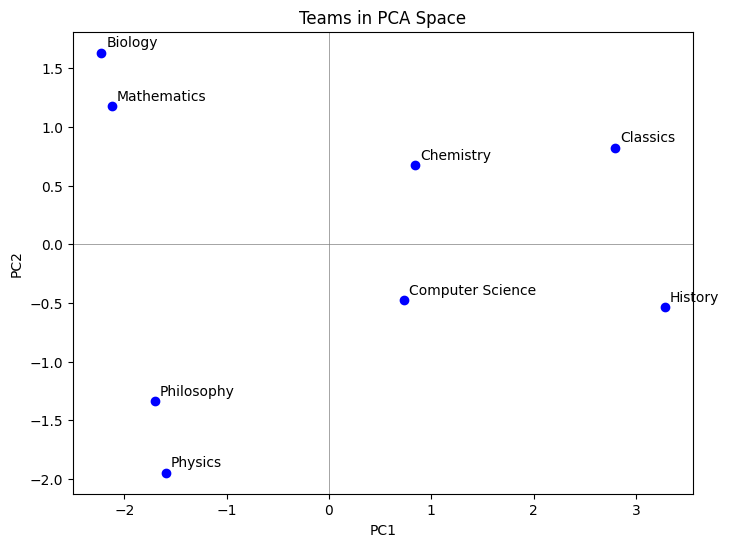

In [54]:
# Requires matplotlib as plt
plt.figure(figsize=(8,6))
plt.scatter(coords[:,0], coords[:,1], color='blue')

for i, team in enumerate(teams):
    plt.text(coords[i,0]+0.05, coords[i,1]+0.05, team)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Teams in PCA Space")
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.show()

Who looks the strongest in the plot? Explain the data.

*Hint:* What happens when you multiply a principal component direction $\mathbf{v}_i$ by $-1$?

### 2.2 EXERCISE: How much energy is captured by the first two PCs?

We chose $k=2$ because we like to have a plot to look at. But maybe that was a bad choice! Was it?

In [ ]:
# EXERCISE: how much energy is captured by the first two PCs?
total_energy = np.sum(S**2)
### TODO:
# energy_pc1 = ...
# energy_pc2 = ...
print(f"PC1: {energy_pc1:.2%}, PC2: {energy_pc2:.2%}")
print(f"Total: {energy_pc1 + energy_pc2:.2%}")

PC1: 72.32%, PC2: 23.52%
Total: 95.83%


### 2.3 EXERCISE: What is the first PC measuring?

The first principal component captures the majority (see the previous block) of the energy of the data. But what is it measuring? You need to have an answer to take back to the suits!

In [ ]:
### Hint: Look at Vt

### 2.4 EXERCISE: What does PC2 measure?